In [1]:
# Data handling and numerical libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning library
from keras.applications.densenet import DenseNet201

# IPython settings for interactive shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


<h2> <b><span style="color:orange"> 1. Load Dataset Cat & Dog</span></b></h2>

In [2]:
# Importing necessary libraries
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Uncomment if needed
# from keras.layers import Input, Lambda, Dense, Flatten
# from keras.models import Model, Sequential
# import numpy as np
# from glob import glob


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mat4py import loadmat

In [4]:
import cv2


In [5]:
# from mat4py import loadmat
data = loadmat('CatDog.mat')

In [6]:
# Extracting 'X', 'G', 'nx', and 'ny'
X = data['X']
Y = data['G']
nx = data['nx']
ny = data['ny']

In [7]:
# Convert lists X and Y to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Check the shapes of the NumPy arrays
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (4096, 242)
Shape of Y: (242,)


In [8]:
data.keys()

dict_keys(['X', 'G', 'nx', 'ny'])

<h2> <b><span style="color:orange"> 2. Preprocess Data</span></b></h2>

## 2.1 Scale data

In [9]:
# 1. Transpose the feature matrix 'X'
X_transposed = np.transpose(X)

In [10]:
# 2. Normalizing 'X' to the range [0, 1]
X_normalized = (X_transposed - np.min(X_transposed)) / (np.max(X_transposed) - np.min(X_transposed))

In [11]:
# 3. Reshaping 'X' to (n, 64, 64, 1) (batch size; width in pixels; height in pixels; color 1 = gray, 3 = rbg)
X_reshaped = X_normalized.reshape(-1, nx, ny, 1)

In [12]:

# 4. Converting to RGB scale (replicating the single channel to three channels)
X_rgb = np.concatenate([X_reshaped] * 3, axis=-1)


In [13]:
# 5. Transpose images (swapping height and width dimensions to rotate images by 90 degrees clockwise)
X_rotated = np.transpose(X_rgb, (0, 2, 1, 3))[:, ::1, :, :]

In [14]:
print("Original shape:", X.shape)
print("Transposed shape:", X_transposed.shape)
print("Normalized shape:", X_normalized.shape)
print("Reshaped shape:", X_reshaped.shape)
print("RGB shape:", X_rgb.shape)
print("Rotated shape:", X_rotated.shape)

Original shape: (4096, 242)
Transposed shape: (242, 4096)
Normalized shape: (242, 4096)
Reshaped shape: (242, 64, 64, 1)
RGB shape: (242, 64, 64, 3)
Rotated shape: (242, 64, 64, 3)


In [15]:
# Redize X_rotated that are 64x64x3 images to 224x224x3 images
resized_images = []

for img in X_rotated:
    # Convert the image to uint8 format
    img_uint8 = np.uint8(img * 255)
    
    # Resize the image to 224*224 using OpenCV
    resized_img = cv2.resize(img_uint8, (224, 224), interpolation=cv2.INTER_AREA)
    
    # Normalize the resized image back to range [0, 1]
    resized_img = resized_img / 255.0
    
    # Append the resized image to the list
    resized_images.append(resized_img)

# Convert the list of resized images to a NumPy array
X_resized = np.array(resized_images)

In [16]:
print(X_resized.shape)

(242, 224, 224, 3)


<h2> <b><span style="color:orange"> 3. Discover and Visualize the Data to Gain Insights</span></b></h2>

In [17]:
# Reshape 'X_rotated' to have dimensions (224,224, 3) and represents color images (RGB)
images = np.array(X_rotated).reshape(-1, nx, ny, 3)

<Axes: >

Text(0.5, 1.0, 'Cat')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog')

(-0.5, 63.5, 63.5, -0.5)

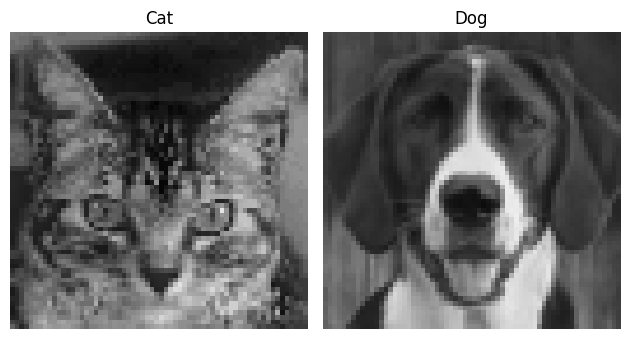

In [18]:
# Find indices for cat and dog image
cat_index = np.where(Y == 0)[0][0]  # 0 == a cat label
dog_index = np.where(Y== 1)[0][0]  # 1 == a dog label 

# Display cat and dog images
plt.subplot(1, 2, 1)
plt.imshow(images[cat_index]) 
# plt.imshow(images[cat_index], cmap='gray') 
plt.title("Cat")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images[dog_index])
# plt.imshow(images[dog_index], cmap='gray')
plt.title("Dog")
plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Cat 1')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 2')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 3')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 4')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 5')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 1')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 2')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 3')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 4')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 5')

(-0.5, 63.5, 63.5, -0.5)

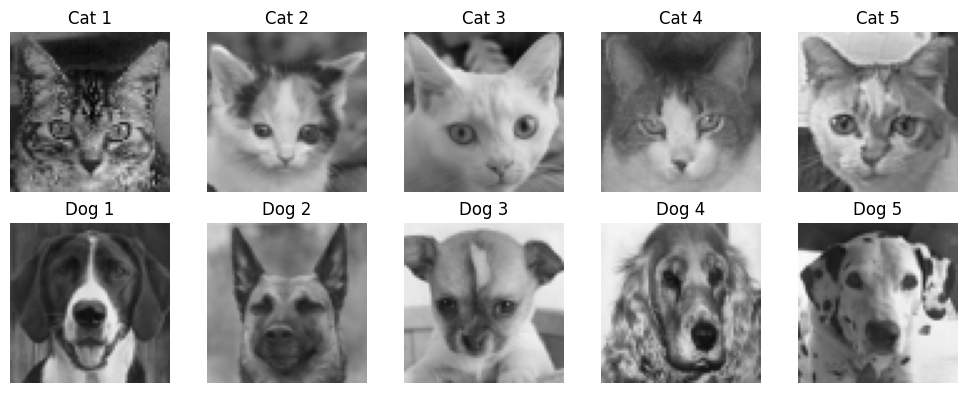

In [19]:
# Display the first 5 images of cats and dogs

# Find indices for cat and dog images
cat_indices = np.where(Y == 0)[0]  # 0 == a cat label
dog_indices = np.where(Y == 1)[0]  # 1 == a dog label

plt.figure(figsize=(10, 4))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[cat_indices[i]], cmap='gray') 
    plt.title(f"Cat {i + 1}")
    plt.axis('off')

for i in range(5):
    plt.subplot(2, 5, 5 + i + 1)
    plt.imshow(images[dog_indices[i]], cmap='gray')
    plt.title(f"Dog {i + 1}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<h2> <b><span style="color:orange"> 4. Train Test Split </span></b></h2>

In [20]:
print("Shape of X:", X_resized.shape)
print("Shape of Y:", Y.shape)

Shape of X: (242, 224, 224, 3)
Shape of Y: (242,)


In [21]:
# Reshape Y to match the number of samples in X
# Y = np.expand_dims(Y, axis=1)  # Adds a new axis to Y to match the number of samples in X

from sklearn.model_selection import train_test_split
# Perform the train-test split with updated Y
X_train, X_test, Y_train, Y_test = train_test_split(X_resized, Y, test_size=0.2, random_state=2)


In [22]:
print("Shape of X:", X_test.shape)
print("Shape of Y:", Y_test.shape)

Shape of X: (49, 224, 224, 3)
Shape of Y: (49,)


<h2> <b><span style="color:orange"> 5. Build model for prediction </span></b></h2>

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.models import Model
from keras.layers import Input, BatchNormalization, Conv2D, Flatten, Dense, Dropout, Lambda
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.densenet import DenseNet201
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import tensorflow as tf

from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.inception_resnet_v2 import preprocess_input

### Try: layer.trainable = False

In [25]:
from keras.applications.densenet import DenseNet201
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

def create_DenseNet201_model(input_shape, n_out):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freeze layers in the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(n_out, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


In [26]:
input_shape = (224, 224, 3)
output_class = 1

# Create the DenseNet201-based model
DenseNet201_model = create_DenseNet201_model(input_shape=input_shape, n_out=output_class)

In [27]:
# DenseNet201_model.summary()

In [28]:
DenseNet201_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
Y_train = Y_train.squeeze()  # Ensure the labels are 1D
# Train the model
hist = DenseNet201_model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
7/7 [==============================] - 44s 5s/step - loss: 0.8590 - accuracy: 0.4093 - val_loss: 0.5671 - val_accuracy: 0.7347
Epoch 2/10
7/7 [==============================] - 37s 5s/step - loss: 0.5081 - accuracy: 0.7979 - val_loss: 0.3624 - val_accuracy: 0.8776
Epoch 3/10
7/7 [==============================] - 40s 6s/step - loss: 0.3115 - accuracy: 0.9223 - val_loss: 0.2523 - val_accuracy: 0.9796
Epoch 4/10
7/7 [==============================] - 40s 6s/step - loss: 0.2251 - accuracy: 0.9430 - val_loss: 0.1905 - val_accuracy: 0.9796
Epoch 5/10
7/7 [==============================] - 43s 6s/step - loss: 0.1783 - accuracy: 0.9482 - val_loss: 0.1564 - val_accuracy: 0.9796
Epoch 6/10
7/7 [==============================] - 43s 6s/step - loss: 0.1520 - accuracy: 0.9534 - val_loss: 0.1349 - val_accuracy: 0.9796
Epoch 7/10
7/7 [==============================] - 44s 6s/step - loss: 0.1328 - accuracy: 0.9637 - val_loss: 0.1189 - val_accuracy: 1.0000
Epoch 8/10
7/7 [==================

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_custom_model(input_shape, n_out):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_out, activation='sigmoid'))  # Sigmoid for binary classification

    return model



In [35]:
input_shape = (224, 224, 3)
output_class = 1

custom_model = create_custom_model(input_shape=input_shape, n_out=output_class)
custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [37]:
Y_train = Y_train.squeeze()  # Ensure the labels are 1D
# Train the model
hist3 = custom_model.fit(X_train, Y_train, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
7/7 [==============================] - 14s 2s/step - loss: 2.2623 - accuracy: 0.5181 - val_loss: 0.9444 - val_accuracy: 0.4898
Epoch 2/8
7/7 [==============================] - 13s 2s/step - loss: 0.7279 - accuracy: 0.5751 - val_loss: 0.6127 - val_accuracy: 0.6531
Epoch 3/8
7/7 [==============================] - 15s 2s/step - loss: 0.5408 - accuracy: 0.7358 - val_loss: 0.4415 - val_accuracy: 0.8980
Epoch 4/8
7/7 [==============================] - 18s 3s/step - loss: 0.3716 - accuracy: 0.8549 - val_loss: 0.2730 - val_accuracy: 0.8571
Epoch 5/8
7/7 [==============================] - 18s 3s/step - loss: 0.2133 - accuracy: 0.9171 - val_loss: 0.8507 - val_accuracy: 0.6939
Epoch 6/8
7/7 [==============================] - 20s 3s/step - loss: 0.2235 - accuracy: 0.9067 - val_loss: 0.5236 - val_accuracy: 0.8571
Epoch 7/8
7/7 [==============================] - 19s 3s/step - loss: 0.1447 - accuracy: 0.9637 - val_loss: 0.3118 - val_accuracy: 0.8776
Epoch 8/8
7/7 [==========================

<h3> <b><span style="color:orange"> 6)	Evaluate model </span></b></h3>

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

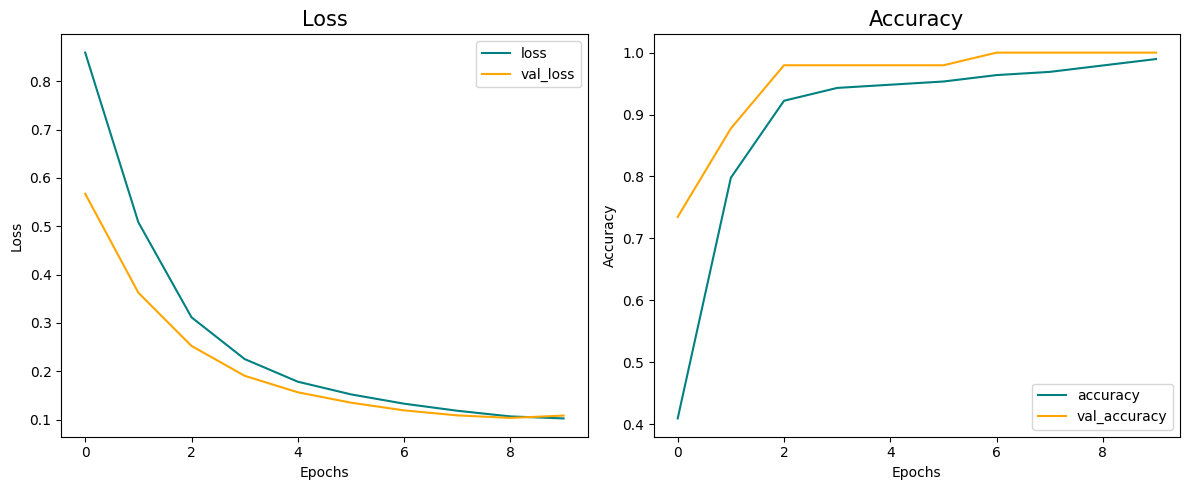

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axs[0].plot(hist.history['loss'], color='teal', label='loss')
axs[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
axs[0].set_title('Loss', fontsize=15)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy plot
axs[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
axs[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].set_title('Accuracy', fontsize=15)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

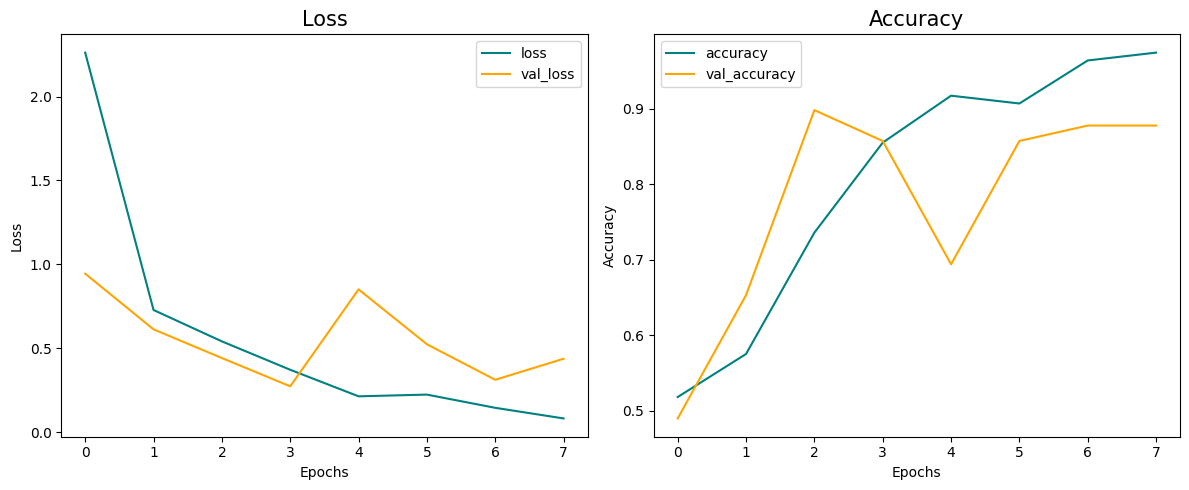

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axs[0].plot(hist3.history['loss'], color='teal', label='loss')
axs[0].plot(hist3.history['val_loss'], color='orange', label='val_loss')
axs[0].set_title('Loss', fontsize=15)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy plot
axs[1].plot(hist3.history['accuracy'], color='teal', label='accuracy')
axs[1].plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].set_title('Accuracy', fontsize=15)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

<h3> <b><span style="color:orange"> 7)	Use trained model to predict </span></b></h3>

1/1 [==============================] - 0s 198ms/step
Cat


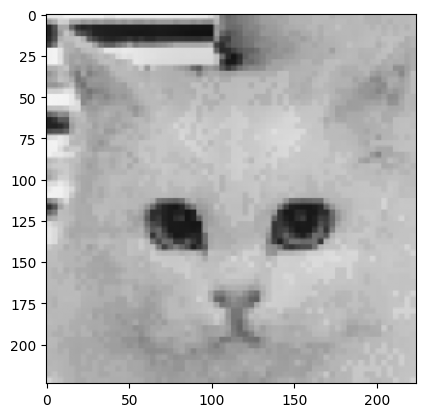

In [41]:
image_index = 44
plt.imshow(X_test[image_index].reshape(224, 224, 3))  # Display the image
pred = custom_model.predict(X_test[image_index].reshape(1, 224, 224, 3))  # Reshape to match input shape
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 3s 3s/step
Cat


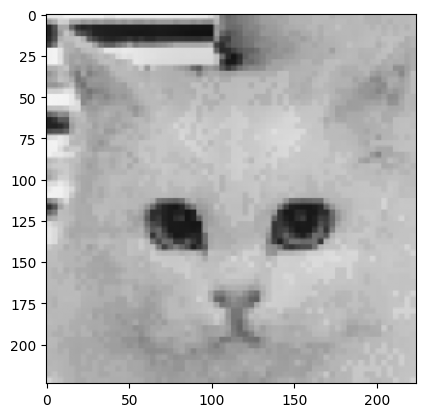

In [42]:
image_index = 44
plt.imshow(X_test[image_index].reshape(224, 224, 3))  # Display the image
pred2 = DenseNet201_model.predict(X_test[image_index].reshape(1, 224, 224, 3))  # Reshape to match input shape
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)